In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_gen = ImageDataGenerator(rescale=1.0/255)

In [28]:
train_data = train_data_gen.flow_from_directory('train' , target_size=(150,150) , batch_size=20 , class_mode="binary")

Found 6 images belonging to 2 classes.


In [29]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.optimizers import SGD , Adam

In [31]:
model = Sequential()
model.add(Flatten())
model.add(Dense(5000 ,  activation='relu'))
model.add(Dense(1 , activation="sigmoid"))

In [32]:
model.compile(loss="binary_crossentropy" , 
             optimizer = 'adam' ,
             metrics=["acc"])

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [35]:
hist = model.fit(train_data , epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 2.5630e-37 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 15.5011 - acc: 0.6667
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 5.1178 - acc: 0.8333
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.7846e-38 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000


In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 5000)              337505000 
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5001      
Total params: 337,510,001
Trainable params: 337,510,001
Non-trainable params: 0
_________________________________________________________________


In [51]:
test_data = train_data_gen.flow_from_directory('test' , target_size=(150,150) , batch_size=20 , class_mode="binary")

Found 3 images belonging to 2 classes.


In [52]:
test_data.class_indices

{'Cat': 0, 'Dog': 1}

In [53]:
Y = model.predict(test_data)

In [54]:
Y

array([[0.],
       [1.],
       [0.]], dtype=float32)

In [55]:
import numpy as np

In [56]:
np.where(Y>0 , "Dog" , "Cat")

array([['Cat'],
       ['Dog'],
       ['Cat']], dtype='<U3')

In [96]:
from tensorflow.keras.preprocessing import image
img = image.load_img("./test/3.jpg" , target_size=(150,150))

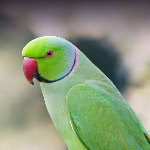

In [105]:
img

In [104]:
X = image.img_to_array(img)/255

In [98]:
x = X.reshape(1,-1)

In [99]:
y = model.predict(x)

In [100]:
y

array([[0.]], dtype=float32)

In [101]:
np.where(y>0 ,"Dog" ,"Cat")

array([['Cat']], dtype='<U3')